# Ecommerce Purchases Exercise - Week 1
# Truong Van Long - ML01 

#### Import pandas and read in the Ecommerce Purchases csv file and set it to a DataFrame called ecom.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('EcommercePurchases.csv')

## The DataHead

In [3]:
#Data Head 
data.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


## Detail information of the Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
Address             10000 non-null object
Lot                 10000 non-null object
AM or PM            10000 non-null object
Browser Info        10000 non-null object
Company             10000 non-null object
Credit Card         10000 non-null int64
CC Exp Date         10000 non-null object
CC Security Code    10000 non-null int64
CC Provider         10000 non-null object
Email               10000 non-null object
Job                 10000 non-null object
IP Address          10000 non-null object
Language            10000 non-null object
Purchase Price      10000 non-null float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


### 1.How many Row and Column ?


In [5]:
count_row=data.shape[0]
count_column=data.shape[1]
print('Row =',count_row,'and Column =',count_column)

Row = 10000 and Column = 14


### 2. The Average, Highest & Lowest 'Purchase Prices'

In [6]:
#Average of Purchase Price
print('Average of Purchase Price:',data['Purchase Price'].mean())

Average of Purchase Price: 50.34730200000025


In [7]:
#Max of Purchase price
print('Max number of Purchase Price:',data['Purchase Price'].max())

Max number of Purchase Price: 99.99


In [8]:
#Min of purchase price
print('Min number of Purchase Price:',data['Purchase Price'].min())

Min number of Purchase Price: 0.0


### 3. How many people have English 'en' as their Language of choice on the website? 

In [9]:
data_en=data.loc[data['Language']=='en']
data_en_count=data_en['Language'].value_counts()
print('Total :',data_en_count)

Total : en    1098
Name: Language, dtype: int64


### 4. How many people have the job title of "Lawyer" ? 


In [10]:
data_lawyer=data.loc[data['Job']=='Lawyer']
data_lawyer['Job'].value_counts()

Lawyer    30
Name: Job, dtype: int64

### 5.How many people made the purchase during the AM and how many people made the purchase during PM ?

In [11]:
data_time=data.loc[data['AM or PM'].isin(['AM','PM'])]
data_time['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

### 6. What are the 5 most common Job Titles? 

In [12]:
data['Job'].value_counts().nlargest(5)

Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Designer, jewellery              27
Purchasing manager               27
Name: Job, dtype: int64

### 7. Someone made a purchase that came from Lot: "90 WT" , what was the Purchase Price for this transaction? 

In [13]:
data.loc[data['Lot']=="90 WT"]['Purchase Price']

513    75.1
Name: Purchase Price, dtype: float64

### 8. What is the email of the person with the following Credit Card Number: 4926535242672853 ?

In [14]:
data.loc[data['Credit Card']==4926535242672853]['Email']

1234    bondellen@williams-garza.com
Name: Email, dtype: object

### 9. How many people have American Express as their Credit Card Provider *and* made a purchase above $95 ?

In [15]:
data_ccprovider=data.loc[(data['CC Provider']=='American Express') & (data['Purchase Price']>95)]
data_ccprovider['CC Provider'].value_counts()

American Express    39
Name: CC Provider, dtype: int64

### 10. (Hard): How many people have a credit card that expires in 2025? 

#### 10.1 List the credit card that expires in 2025

In [16]:
data['CC Exp Date']=pd.to_datetime(data['CC Exp Date'],format='%m/%y')
s2=data.loc[(data['CC Exp Date'] < "2026-01") & (data['CC Exp Date'] > "2024-12")]
s2['CC Exp Date'].value_counts()
#data[(data['CC Exp Date']>"2025-01-01" & (data['CC Exp Date']< "2025-12-01"))]

2025-04-01    99
2025-06-01    97
2025-03-01    96
2025-12-01    91
2025-01-01    91
2025-02-01    90
2025-05-01    88
2025-08-01    87
2025-07-01    85
2025-09-01    78
2025-11-01    67
2025-10-01    64
Name: CC Exp Date, dtype: int64

#### 10.2 How many people (In total) have a Credit Card expires in 2025

In [17]:
#Total number of people have a credit card that expires in 2025
s2['CC Exp Date'].value_counts().sum()

1033

### 11. (Hard): What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...) 

In [18]:
data_email=data['Email'].str.split('@').str[1]
data_email_count=data_email.value_counts()
data_email_plot=data_email.value_counts().nlargest(5)
data_email_plot

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

### 12. (Hard): What are the most popular Browser Info (or Browser version) ?

In [19]:
data['Browser Info'].unique()
data_browser=data['Browser Info'].str.split('(').str[0]
data_browser_plot=data_browser.value_counts().nlargest(10)
data_browser_plot

Mozilla/5.0     7924
Opera/9.34.       23
Opera/8.51.       22
Opera/8.74.       21
Opera/8.38.       20
Opera/8.87.       19
Opera/9.74.       19
Opera/8.65.       19
Opera/9.38.       18
Opera/9.95.       18
Name: Browser Info, dtype: int64

# Data Visualization

### Implement a bar plot for top 5 most popular email providers/hosts 

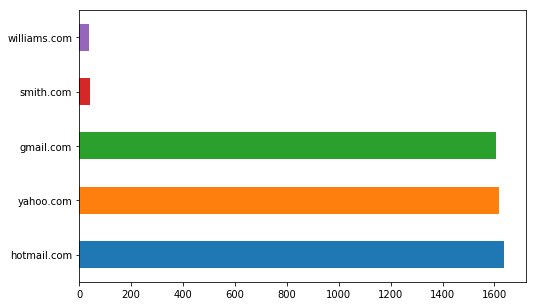

In [20]:
data_email_plot.plot(kind='barh',figsize=(8,5))

### Implement a Plot distribution of Purchase Price

#### * Plot distribution of Purchase Price per Time (AM - PM)

/Users/truonglong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


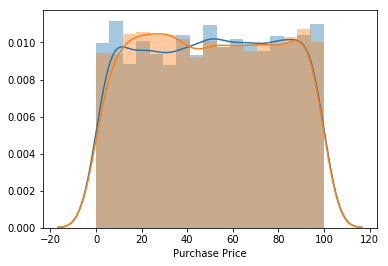

In [21]:
sns.distplot(data[data['AM or PM']=="PM"]['Purchase Price'])
sns.distplot(data[data['AM or PM']=="AM"]['Purchase Price'])

#### * Plot distribution of Purchase Price

/Users/truonglong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


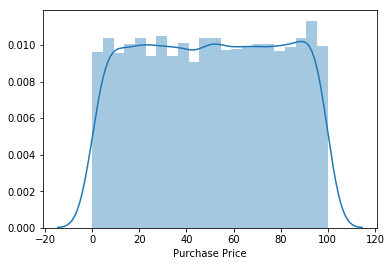

In [22]:
sns.distplot(data['Purchase Price'])

### Implement countplot on Language

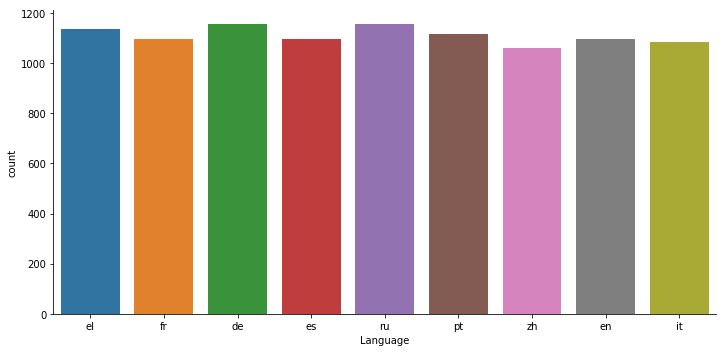

In [23]:
sns.catplot(x='Language',data=data,kind='count',aspect=2)

### Implement countplot on Browser

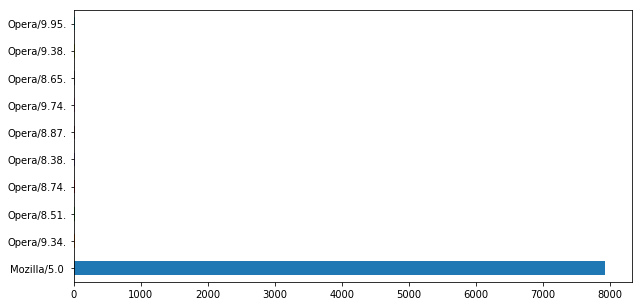

In [24]:
data_browser_plot.plot(kind='barh',figsize=(10,5))

# Great Job!